# EXP-01

### Import libraries

In [32]:
# import libraries
import numpy as np
import pandas as pd
import igraph as ig
import networkx as nx
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from collections import OrderedDict
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit
from auxiliar_funcs import *

# Load data

In [5]:
# Import data
url_file = "data/train.csv"
df = pd.read_csv(url_file)
print("Columns: ", df.columns)
print("Length: ", len(df))

# Data statistics
n_users = len(df[df.columns[2:]].drop_duplicates())
n_rsrcs = len(df.RESOURCE.drop_duplicates())
print("|U|: ", n_users) # Usuarios únicos
print("|R|: ", n_rsrcs) # Registros únicos

# Add and index for every unique user
user_dict = {}
for u_idx, u_attr in enumerate(df[df.columns[2:]].drop_duplicates().values):
    idx = str(u_idx) + "101"
    user_dict[int(idx)] = list(u_attr)
print("|U| :", len(user_dict))

# Create a new column to add in a DF
list_usr_idx = []
key_list = list(user_dict.keys()) # list out keys and values separately
val_list = list(user_dict.values())
for log in df[df.columns[2:]].values:
    key_idx = val_list.index(list(log))
    list_usr_idx.append(key_list[key_idx])
print("|L'| :", len(list_usr_idx), " = |L| :", len(df))
df["USERID"] = list_usr_idx

print()
df_pos_entries = df[df.ACTION==1]
df_neg_entries = df[df.ACTION==0]
print('Num positive entries:',len(df_pos_entries), 
    "{:.4}%".format((len(df_pos_entries)/len(df))*100))
print('Num negative entries:',len(df_neg_entries),
    "{:.4}%".format((len(df_neg_entries)/len(df))*100))

##### ***** Cross-Validation ***** #####
k = 10
test_size = 0.2
kfold = StratifiedShuffleSplit(n_splits=k, test_size=test_size, random_state=1)

data_partition = kfold.split(df, df.ACTION)
data_corpus = [] # Lista donde se almacenan los k fols

for train_data, test_data in data_partition:        
    X_train, X_test = df.iloc[train_data], df.iloc[test_data]
    data_corpus.append([X_train, X_test])

print("Done!")

Columns:  Index(['ACTION', 'RESOURCE', 'MGR_ID', 'ROLE_ROLLUP_1', 'ROLE_ROLLUP_2',
       'ROLE_DEPTNAME', 'ROLE_TITLE', 'ROLE_FAMILY_DESC', 'ROLE_FAMILY',
       'ROLE_CODE'],
      dtype='object')
Length:  32769
|U|:  9561
|R|:  7518
|U| : 9561
|L'| : 32769  = |L| : 32769

Num positive entries: 30872 94.21%
Num negative entries: 1897 5.789%
Done!


# Data Pre-processing

## Task 1, 2, 3, and 4

In [6]:
##### ***** Control Variables ***** #####
id_kfold = 1
task4 = True
#########################################

df_train_k, df_test_k = data_corpus[id_kfold][0], data_corpus[id_kfold][1]
print("# Train access request =", len(df_train_k), 
      " %: {:.2f}".format((len(df_train_k)/(len(df_train_k)+len(df_test_k)))*100))
print("# Test access request =", len(df_test_k),
      " %: {:.2f}".format((len(df_test_k)/(len(df_train_k)+len(df_test_k)))*100))
print("# Total =", len(df_train_k)+len(df_test_k))
print()

##### ***** Task 1: Null and uknwokn values ***** #####
print("TASK 1: Done!"); print() # NA


##### ***** TASK 2: convert continuous values to categorical values ***** #####
print("TASK 2: Done!"); print() # NA 

##### ***** TASK 3: Drop duplicates access requests ***** #####
print("TASK 3: Drop duplicates access requests")
df_train_k_pos = df_train_k[df_train_k.ACTION==1]   # Train Pos
df_train_k_neg = df_train_k[df_train_k.ACTION==0]   # Train Neg
df_test_k_pos = df_test_k[df_test_k.ACTION==1]      # Test Pos
df_test_k_neg = df_test_k[df_test_k.ACTION==0]      # Test Neg
df_train_k_pos = df_train_k_pos[df_train_k_pos.columns[1:]].drop_duplicates()
df_train_k_neg = df_train_k_neg[df_train_k_neg.columns[1:]].drop_duplicates()
df_test_k_pos = df_test_k_pos[df_test_k_pos.columns[1:]].drop_duplicates()
df_test_k_neg = df_test_k_neg[df_test_k_neg.columns[1:]].drop_duplicates()
print()

print("# Solicitudes Train (+):", len(df_train_k_pos), " %: {:.2f}".format((len(df_train_k_pos)/len(df_train_k))*100))
print("# Solicitudes Train (-):", len(df_train_k_neg), " %: {:.2f}".format((len(df_train_k_neg)/len(df_train_k))*100))
print("# Solicitudes Test (+):", len(df_test_k_pos), " %: {:.2f}".format((len(df_test_k_pos)/len(df_test_k))*100))
print("# Solicitudes Test (-):", len(df_test_k_neg), " %: {:.2f}".format((len(df_test_k_neg)/len(df_test_k))*100))
print("# Train Users (+): ", len(df_train_k_pos.USERID.drop_duplicates()))
print("# Train Resrc (+): ", len(df_train_k_pos.RESOURCE.drop_duplicates()))
print("# Train Users (-): ", len(df_train_k_neg.USERID.drop_duplicates()))
print("# Train Resrc (-): ", len(df_train_k_neg.RESOURCE.drop_duplicates()))
print("# Test Users (+): ", len(df_test_k_pos.USERID.drop_duplicates()))
print("# Test Resrc (+): ", len(df_test_k_pos.RESOURCE.drop_duplicates()))
print("# Test Users (-): ", len(df_test_k_neg.USERID.drop_duplicates()))
print("# Test Resrc (-): ", len(df_test_k_neg.RESOURCE.drop_duplicates())); print()

if task4:
    # Filter resources
      n1 = 0
      n2 = 149
      top_list = df_train_k_pos.RESOURCE.value_counts()[:len(df_train_k_pos.RESOURCE.drop_duplicates())].index.tolist()
      # Filter the interval between n1 and n2
      top_list = top_list[n1:n2+1]
      print('#Filtered resources:', len(top_list))
      boolean_series = df_train_k_pos.RESOURCE.isin(top_list)
      df_train_k_pos = df_train_k_pos[boolean_series]
      bolean_series = df_train_k_neg.RESOURCE.isin(top_list)
      df_train_k_neg = df_train_k_neg[bolean_series]
      print("Done!")
      

# Train access request = 26215  %: 80.00
# Test access request = 6554  %: 20.00
# Total = 32769

TASK 1: Done!

TASK 2: Done!

TASK 3: Drop duplicates access requests

# Solicitudes Train (+): 24697  %: 94.21
# Solicitudes Train (-): 1518  %: 5.79
# Solicitudes Test (+): 6175  %: 94.22
# Solicitudes Test (-): 379  %: 5.78
# Train Users (+):  8548
# Train Resrc (+):  6430
# Train Users (-):  819
# Train Resrc (-):  977
# Test Users (+):  4060
# Test Resrc (+):  2767
# Test Users (-):  295
# Test Resrc (-):  284

#Filtered resources: 150
Done!


# 2 Network Modelling

In [7]:
def build_network_model(data, usr_id_name, res_id_name, file_path=None):
    """
    Builds the Access Requests Bipartite Network from Access log.

    Args:
        data (pandas dataframe): The Access Log.
        usr_id_name (str): The name of the ID users column in the Access Log
        res_id_name (str): The name of the ID resources column in the Access Log
    
    Returns:
        Graph (iGraph): The Access Requests Bipartite Network.

    Raises:
        TypeError: If a network is not Bipartite.
    """
    
    list_of_edges = []
    bi_network = nx.Graph() # NetworkX Graph object

    for usr_idx, rsr_idx in data[[usr_id_name, res_id_name]].values:
        list_of_edges.append((int(usr_idx), int(rsr_idx))) # Tuple of edges
    bi_network.add_edges_from(list_of_edges) # Build Network with edges

    # Change networkX object to iGraph object
    bi_network = ig.Graph.from_networkx(bi_network)
    bi_network.vs['name'] = bi_network.vs["_nx_name"] # Clean name column
    del bi_network.vs["_nx_name"] # Remove uncleaned name column

    if not bi_network.is_bipartite():
        raise TypeError("The ARBN is not bipartite")

    ### Add type of node (user or resource)
    list_of_resources_in_data = list(data[res_id_name])
    list_node_type = []
    for node in bi_network.vs():
        if node['name'] in list_of_resources_in_data:
            list_node_type.append(1) # A resource
        else:
            list_node_type.append(0) # An user
    bi_network.vs["typen"] = list_node_type
    ### End node type

    if not file_path == None: # Create a file
        ig.write(bi_network, file_path)

    print("ARBN builded!")
    print(bi_network.summary())
    print("|U-Nodes| =", len(bi_network.vs.select(typen=0)))
    print("|R-Nodes| =", len(bi_network.vs.select(typen=1)))

    return bi_network
    

## TASK 1: Bipartite Access Requests Network

In [8]:
bip_network = build_network_model(df_train_k_pos, 'USERID', 'RESOURCE')

ARBN builded!
IGRAPH UN-- 5586 9501 -- 
+ attr: name (v), typen (v)
|U-Nodes| = 5436
|R-Nodes| = 150


## Tarea 2: User Network

#### Main

In [9]:
g_proj_B = graph_projectionB(bip_network)
print(nx.info(g_proj_B)) # Networkx graph

# Convert to igraph object graph
g_proj_B = ig.Graph.from_networkx(g_proj_B)
g_proj_B.vs["name"] = g_proj_B.vs["_nx_name"]
del g_proj_B.vs["_nx_name"]

print(g_proj_B.summary())


Name: 
Type: Graph
Number of nodes: 5436
Number of edges: 743311
Average degree: 273.4772
IGRAPH UNW- 5436 743311 -- 
+ attr: name (v), weight (e)


# 3 Community Detection

## Task 1: Community Detection

In [10]:
partition = g_proj_B.community_multilevel(weights=g_proj_B.es()["weight"])
print("Modularity: %.4f" % partition.modularity)
# Add cluster attribute to nodes
g_proj_B.vs["cluster"] = partition.membership
print(g_proj_B.summary())
print(partition.summary())

Modularity: 0.6510
IGRAPH UNW- 5436 743311 -- 
+ attr: cluster (v), name (v), weight (e)
Clustering with 5436 elements and 16 clusters


### Sub-Communities

In [11]:
# Se obtienen las comunidades y sub-comunidades
g = g_proj_B

density_threshold = 0.5

n_coms = len(set(g.vs["cluster"]))
count_n_coms = 0 # Contador de número de comunidades detectadas
# Diccionario con las comunidades. Id de la comunidad como key y una lista 
# como value {01: [subgrafo, recursos_list]}
dict_total_coms = {} 

for idx_comm in range(n_coms): # Recorrer cada comunidad en la red
    subgraph_nodes = g.vs.select(cluster=idx_comm) # Sacamos los nodos con el cluster
    comm_subgraph = subgraph_nodes.subgraph() # Objeto de subgrafo

    # Verificar si la densidad es baja: Si es baja se puede clasificar
    if comm_subgraph.density() < density_threshold:

        # Se realiza nuevamente una partición
        new_partition = comm_subgraph.community_multilevel(
            weights =comm_subgraph.es["weight"] )        

        for sub_com in new_partition.subgraphs(): # Se recorre cada nueva sub comunidad
            # Usuarios en la comunidad
            user_set_comm = sub_com.vs()["name"]   
            # Recursos en la comunidad
            n_res = num_recursos(user_set_comm, bip_network)            
            dict_total_coms[str(count_n_coms)] = [sub_com, n_res]
            count_n_coms += 1
    else:
        user_set_comm = comm_subgraph.vs()["name"]   
        # Recursos en la comunidad
        n_res = num_recursos(user_set_comm, bip_network)            
        dict_total_coms[str(count_n_coms)] = [comm_subgraph, n_res]
        count_n_coms += 1

print("# de Comunidades: ", len(dict_total_coms))

# de Comunidades:  78


## Task 2: Community classification

#### Main

In [12]:
# Obtener el máximo valor de recursos en el total de comunidades
n_res_in_comms = [len(i[1]) for i in dict_total_coms.values()]
max_n_res = max(n_res_in_comms)
print("Comunidad con # mayor recursos", max_n_res)

# Umbrales para la clasificación de comunidades
big_threshold = int(0.50 * max_n_res)
med_threshold = int(0.25 * max_n_res)
print("Big Threshold: ", big_threshold, " \t\t Med Threshold", med_threshold)

Comunidad con # mayor recursos 103
Big Threshold:  51  		 Med Threshold 25


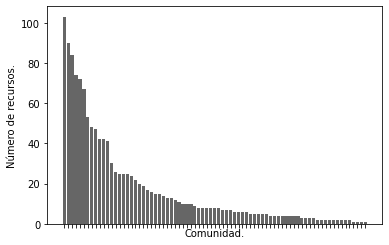

In [22]:
plt.bar(dict_total_coms.keys(), sorted(n_res_in_comms, reverse=True), color='0.40')
plt.ylabel('Número de recursos.')
plt.xlabel('Comunidad.')
plt.tick_params(labelbottom=False)
#plt.savefig('n_recursos_por_comunidad_amz.pdf')

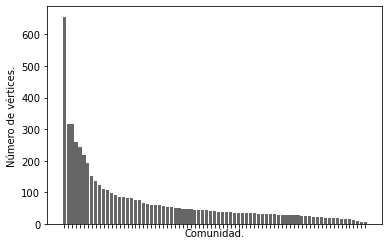

In [23]:
lista_tamano_coms = []
for i in dict_total_coms:
    lista_tamano_coms.append(dict_total_coms[i][0].vcount())
    #print(dict_total_coms[i][0].vcount())
len(lista_tamano_coms)

# plt.figure(figsize=(20,15))
plt.bar(dict_total_coms.keys(), sorted(lista_tamano_coms, reverse=True), color='0.40')
plt.ylabel('Número de vértices.')
plt.xlabel('Comunidad.')
plt.tick_params(labelbottom=False)
#plt.savefig('n_vertices_por_comunidad_amz.pdf')


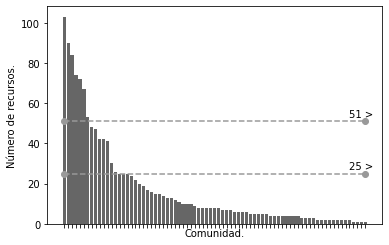

In [24]:
# plt.figure(figsize=(20,15))
plt.bar(dict_total_coms.keys(), sorted(n_res_in_comms, reverse=True), color='0.40')
plt.ylabel('Número de recursos.')
plt.xlabel('Comunidad.')
x, y = [0, len(n_res_in_comms)-1] , [big_threshold, big_threshold]
plt.plot(x, y, marker = 'o', linestyle='--', color="0.6")
plt.text(len(n_res_in_comms)-5, big_threshold+6, '{} >'.format(big_threshold) , ha='left', va= 'top')
x, y = [0, len(n_res_in_comms)-1] , [med_threshold, med_threshold]
plt.plot(x, y, marker = 'o', linestyle='--', color="0.6")
plt.text(len(n_res_in_comms)-5, med_threshold+6, '{} >'.format(med_threshold) , ha='left', va= 'top')
plt.tick_params(labelbottom=False)
#plt.savefig('n_recursos_por_comunidad_amz-corte.pdf')

In [15]:
big_comms = [] # Almacenar las comunidades grandes
med_comms = [] # Almacenar las comunidades medianas
sma_comms = [] # Almacenar las comunidades pequeñas

for idx_com, com in enumerate(dict_total_coms.values()):
    if len(com[1]) > big_threshold: # Es comunidad grande
        big_comms.append([idx_com]+com)
    elif len(com[1]) > med_threshold: # Es comunidad mediana
        med_comms.append([idx_com]+com)
    else:
        sma_comms.append([idx_com]+com)

print("# Comunidades:",len(big_comms)+len(med_comms)+len(sma_comms), "==", len(dict_total_coms))
print("Big Comms:", len(big_comms))
print("Med Comms:", len(med_comms))
print("Sma Comms:", len(sma_comms))

# Comunidades: 78 == 78
Big Comms: 8
Med Comms: 6
Sma Comms: 64


# 4 Rule inference

In [13]:
def apriori_in_resources(data_):
    """Retorna regla apriori basada en los recursos.
    data_: dataframe
    """
    init_Sup = 0.6
    init_Conf = 0.9
    rules = []
    while len(rules) == 0: # AND NOT rules in list_rules
        # print("Sup", init_Sup, "  Conf", init_Conf)
        _, rules = apriori(data_.values.tolist(), minSup=init_Sup, minConf=init_Conf) # Apply apriori
        init_Sup -= 0.1
        init_Conf -= 0.1
    # _, rules = apriori(attr_user__, minSup=0.6, minConf=0.9) # Apply apriori
    rules = remove_equal_rules2(rules)
    #for r in rules:
    #    print(r)
    
    reglas_karimi = []
    for r in rules:      
        for t in r:                                    
            col = get_attr_name(t, data_)                                                             
            reglas_karimi.append([col, t])

    return reglas_karimi

def apriori_in_resources_2(data_):
    """Retorna regla apriori basada en los recursos.
    data_: dataframe
    """
    init_Sup = 0.5
    init_Conf = 0.7
    rules = []
    while len(rules) == 0: # AND NOT rules in list_rules
        # print("Sup", init_Sup, "  Conf", init_Conf)
        _, rules = apriori(data_.values.tolist(), minSup=init_Sup, minConf=init_Conf) # Apply apriori
        init_Sup -= 0.1
        init_Conf -= 0.1
    # _, rules = apriori(attr_user__, minSup=0.6, minConf=0.9) # Apply apriori
    print(data_)
    print(rules)
    rules = remove_equal_rules2(rules)
    #for r in rules:
    #    print(r)
    
    reglas_karimi = []
    for r in rules:      
        print(r)
        for t in r:                                                
            print(t)
            col = get_attr_name(t, data_)                                                             
            print([col, t])
            reglas_karimi.append([col, t])
            
#    print(reglas_karimi)
    return reglas_karimi

def apriori_in_resources_3(data_):
    """Retorna regla apriori basada en los recursos.
    data_: dataframe
    """
    init_Sup = 0.6
    init_Conf = 0.9
    rules = []
    while len(rules) == 0: # AND NOT rules in list_rules        
        _, rules = apriori(data_.values.tolist(), minSup=init_Sup, minConf=init_Conf) # Apply apriori
        init_Sup -= 0.1
        init_Conf -= 0.1
    #print(rules)
    rules = remove_equal_rules3(rules)
    #print(rules)
    #print()
    #for r in rules:
    #    print(r)
    
    reglas_karimi = []
    for r in rules:      
        for t in r:                                    
            col = get_attr_name(t, data_)                                                             
            reglas_karimi.append([col, t])

    return reglas_karimi

def apriori_in_resources_4(data_, recurso_atr, reglas_ante):
    """Retorna regla apriori basada en los recursos.
    data_: dataframe
    """
    init_Sup = 0.6
    init_Conf = 0.9
    rules = []
    while len(rules) == 0: # AND NOT rules in list_rules        
        _, rules = apriori(data_.values.tolist(), minSup=init_Sup, minConf=init_Conf) # Apply apriori
        init_Sup -= 0.1
        init_Conf -= 0.1
    #print(rules)
    #rules = remove_equal_rules4(rules, recurso_atr, reglas_ante)
    #print(rules)
    #print()
    #for r in rules:
    #    print(r)
    
    """ Remove equal rules X -> Y == Y -> X"""
    to_remove = []
    #print(rules)
    for rule in rules:
        descri = []
        for ele in rule[0]:
            descri.append(ele)
        for ele in rule[1]:
            descri.append(ele)
        #print(descri)
        descri.sort()
        if descri in to_remove:
            continue
        else:            
            to_remove.append(descri)
    
    used_idx = []

    # Mientras que no se hayan usado todos los indices
    while len(used_idx) < len(to_remove):                
        idx_rand = random.randint(0, len(to_remove)-1) # Número random
        if idx_rand in used_idx:
            continue
        else:            
            used_idx.append(idx_rand)
            selection_ = to_remove[idx_rand] # Regla random
            
            # Regla en formato atr-valor
            reglas_karimi = [] 
            for r in [selection_]:      
                for t in r:                                    
                    col = get_attr_name(t, data_)                                                             
                    reglas_karimi.append([col, t])
            # end

            regla_candidata = recurso_atr + reglas_karimi # Regla candidata
            
            # Si la regla se encuentra en el set de reglas.
            if regla_candidata in reglas_ante: 
                continue
            else:            
                return reglas_karimi
    return [["control", 10901]]


def podar_recursos_new(subcomunidad, grafo_bip, umbral):
    """Retorna los recursos nuevos ya podados."""    
    usuario_comunidad = subcomunidad.vs()["name"]
    all_recursos = {} # DIccionario con los recursos y su frecuencia
    usuario_comunidad = [int(float(i)) for i in usuario_comunidad]
    for user in usuario_comunidad:
        user_node = grafo_bip.vs.find(name=int(float(user)))
        vecinos_recurso = user_node.neighbors()
        vecinos_recurso = [nodo["name"] for nodo in vecinos_recurso]
        vecinos_recurso = list(set(vecinos_recurso))
        for vecino in vecinos_recurso:
            if vecino in all_recursos.keys():
                all_recursos[vecino] += 1
            else:
                all_recursos[vecino] = 1

    umbral_en_n = int(umbral * subcomunidad.vcount())
    
    nuevos_recursos = []
    for item in all_recursos:
        if all_recursos[item] >= umbral_en_n:
            nuevos_recursos.append(item)

    return nuevos_recursos

def get_recursos_significativos(subcomunidad, grafo_bip, umbral):
    """Obtiene una lista de recursos más significativos en la comunidad."""
    usuario_comunidad = subcomunidad.vs()["name"]
    all_recursos = {} # DIccionario con los recursos y su frecuencia
    usuario_comunidad = [int(float(i)) for i in usuario_comunidad]
    for user in usuario_comunidad:
        user_node = grafo_bip.vs.find(name=int(float(user)))
        vecinos_recurso = user_node.neighbors()
        vecinos_recurso = [nodo["name"] for nodo in vecinos_recurso]
        vecinos_recurso = list(set(vecinos_recurso))
        for vecino in vecinos_recurso:
            if vecino in all_recursos.keys():
                all_recursos[vecino] += 1
            else:
                all_recursos[vecino] = 1

    umbral_en_n = int(umbral * subcomunidad.vcount())
    
    nuevos_recursos = []
    for item in all_recursos:
        if all_recursos[item] >= umbral_en_n:
            nuevos_recursos.append(item)
    
    return nuevos_recursos

def get_recursos_significativos2(subcomunidad, grafo_bip, umbral):
    """Obtiene una lista de recursos más significativos en la comunidad."""
    usuario_comunidad = subcomunidad.vs()["name"]
    all_recursos = {} # DIccionario con los recursos y su frecuencia
    usuario_comunidad = [int(float(i)) for i in usuario_comunidad]
    for user in usuario_comunidad:
        user_node = grafo_bip.vs.find(name=int(float(user)))
        vecinos_recurso = user_node.neighbors()
        vecinos_recurso = [nodo["name"] for nodo in vecinos_recurso]
        vecinos_recurso = list(set(vecinos_recurso))
        for vecino in vecinos_recurso:
            if vecino in all_recursos.keys():
                all_recursos[vecino] += 1
            else:
                all_recursos[vecino] = 1

    umbral_en_n = int(umbral * subcomunidad.vcount())
    
    nuevos_recursos = []
    for item in all_recursos:
        nuevos_recursos.append(item)
    
    return nuevos_recursos

## Task 1: Rule inference

In [16]:
dict_ress_coms = {} # Diccionario de recursos
list_rules = [] # Lista de reglas
dict_res_in_coms = {} # Diccionarios de recursos en comunidad
nuevas_reglas = [] # Lista de nuevas reglas.

In [54]:
list_save = []

# To save attributes of the 
attrs_in_rule = []
attrs_to_search = list(set(df_users_in_comm.columns[:-1]).difference(set(attrs_in_rule)))

# To calculate max number of attr
all_attrs = []; max_attr_val = None; max_attr_val_count = 0
for attr in attrs_to_search:

    attr_val = list(df_users_in_comm[attr].value_counts().keys())[0]
    attr_val_count = list(df_users_in_comm[attr].value_counts().values)[0]
    print(attr, attr_val, attr_val_count)

    if attr_val_count > max_attr_val_count:
        max_attr_val_count = attr_val_count
        max_attr_val = attr_val
        max_attr_name = attr

    attrs_in_rule.append(attr)
    

print("\n",max_attr_name, max_attr_val)
    

MGR_ID 3471 3
ROLE_FAMILY_DESC 117906 9
ROLE_DEPTNAME 118042 20
ROLE_FAMILY 270488 22
ROLE_TITLE 118043 14
ROLE_ROLLUP_2 118225 21
ROLE_CODE 118046 14
ROLE_ROLLUP_1 117961 33

 ROLE_ROLLUP_1 117961


In [48]:
df_users_in_comm.columns

Index(['MGR_ID', 'ROLE_ROLLUP_1', 'ROLE_ROLLUP_2', 'ROLE_DEPTNAME',
       'ROLE_TITLE', 'ROLE_FAMILY_DESC', 'ROLE_FAMILY', 'ROLE_CODE', 'USERID'],
      dtype='object')

In [109]:
a = {"a": 1}
list(a.keys())

['a']

In [112]:
df_users_in_comm.ROLE_ROLLUP_1.value_counts().values

array([44, 11,  1])

In [57]:
df_users_in_comm[df_users_in_comm.ROLE_ROLLUP_1==118315].ROLE_ROLLUP_2.value_counts()

118463    23
118316    21
Name: ROLE_ROLLUP_2, dtype: int64

In [38]:
df_users_in_comm

,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE,USERID
29525,40922,118315,118463,118464,119172,140159,118467,119174,7043101
4707,70788,118315,118463,118522,123651,121927,118467,123652,2702101
32049,102217,118315,118316,120764,118465,136945,118467,118468,9485101
21292,88387,118315,118463,118522,118465,175082,118467,118468,8124101
13878,192210,118315,118316,140453,119849,192211,118638,119851,6627101
19727,41804,118315,118463,118404,136701,162182,124487,136702,6381101
22532,28232,118315,118463,118522,119172,132732,118467,119174,8310101
31928,92887,118315,118463,118522,129229,143829,119788,129231,9477101
30411,4945,117961,118300,118360,118054,118054,117887,118055,5337101
19464,10987,119170,119171,140453,143183,198914,119788,143185,7816101


### Small communities

In [18]:
counter_rules = 0
for comm in sma_comms:
    resorces_coms = comm[2] # Se extrae los recursos al que accede.
    if len(resorces_coms) == 1: # Si sólo hay un recurso
        # Se extraen los atributos del único recurso
        regla_i = [ ["id_com", str(comm[0])], [] ] # Se comienza generando la regla.        
        logs_with_resource = df_train_k_pos[df_train_k_pos["RESOURCE"]==comm[2][0]].iloc[0]

        #for attr in rsrc_attr: # Se agrega la regla con atr de recurso
        #    regla_i[1].append([attr, logs_with_resource[attr]])
        
        # Usuarios en la comunidad
        users_in_sub_com = set([int(float(i)) for i in comm[1].vs()["name"]])
        df_users_in_comm = df_train_k_pos[df_train_k_pos["USERID"].isin(users_in_sub_com)]
        df_users_in_comm = df_users_in_comm[df_users_in_comm.columns[1:]].drop_duplicates()                    
        
        # Obtener regla apriori
        regla_atr_usuario = apriori_in_resources(data_=df_users_in_comm)
        regla_i[1] = regla_i[1] + regla_atr_usuario

        list_rules.append(regla_i)
        counter_rules += 1
    else:
        regla_i = [ ["id_com", str(comm[0])], [] ] # Se comienza generando la regla.        
        
        # Solicitudes que incluyen el recurso
        #logs_with_resource = df_train_k_pos[df_train_k_pos['RESOURCE'].isin(comm[2])]
        #logs_with_resource = logs_with_resource[rsrc_attr+["USRID","RESOURCE"]].drop_duplicates()
        #df_resources = logs_with_resource[rsrc_attr+["RESID"]].drop_duplicates()
        
        # Usuarios en la comunidad
        users_in_sub_com = set([int(float(i)) for i in comm[1].vs()["name"]])
        df_users_in_comm = df_train_k_pos[df_train_k_pos["USERID"].isin(users_in_sub_com)]
        df_users_in_comm = df_users_in_comm[df_users_in_comm.columns[1:]].drop_duplicates()                    
        
        # Generar regla con los atributos de los recursos
        # regla_atr_recurso = apriori_in_resources(data_=df_resources) 
        regla_atr_usuario = apriori_in_resources(data_=df_users_in_comm)        

        # Se agrega a la regla
        # regla_i[1] = regla_i[1] + regla_atr_recurso + regla_atr_usuario
        regla_i[1] = regla_i[1] + regla_atr_usuario
        # print(regla_i)
        
        list_rules.append(regla_i)
        counter_rules += 1

print("Reglas generadas:", counter_rules)            

NameError: name 'apriori' is not defined

#### Coms. Medianas

In [27]:
counter_rules = 0
umbral_podado = 0.2
for comm in med_comms:
    resorces_coms = podar_recursos_new(comm[1], gb, umbral_podado)    
    if len(resorces_coms) == 1: # Si sólo hay un recurso
        # Se extraen los atributos del único recurso
        regla_i = [ ["id_com", str(comm[0])], [] ] # Se comienza generando la regla.        
        #logs_with_resource = df_train_k_pos[df_train_k_pos["RESOURCE"]==comm[2][0]].iloc[0]

        #for attr in rsrc_attr: # Se agrega la regla con atr de recurso
        #    regla_i[1].append([attr, logs_with_resource[attr]])
        
        # Usuarios en la comunidad
        users_in_sub_com = set([int(float(i)) for i in comm[1].vs()["label"]])
        df_users_in_comm = df_train_k_pos[df_train_k_pos["USERID"].isin(users_in_sub_com)]
        df_users_in_comm = df_users_in_comm[df_users_in_comm.columns[1:]].drop_duplicates()                    
        
        # Obtener regla apriori
        regla_atr_usuario = apriori_in_resources(data_=df_users_in_comm)
        regla_i[1] = regla_i[1] + regla_atr_usuario

        list_rules.append(regla_i)
        counter_rules += 1
    else:
        regla_i = [ ["id_com", str(comm[0])], [] ] # Se comienza generando la regla.        
        
        # Solicitudes que incluyen el recurso
        # logs_with_resource = df_train_k_pos[df_train_k_pos['RESID'].isin(comm[2])]
        # logs_with_resource = logs_with_resource[rsrc_attr+["USRID","RESID"]].drop_duplicates()
        # df_resources = logs_with_resource[rsrc_attr+["RESID"]].drop_duplicates()
        
        # Usuarios en la comunidad
        users_in_sub_com = set([int(float(i)) for i in comm[1].vs()["label"]])
        df_users_in_comm = df_train_k_pos[df_train_k_pos["USERID"].isin(users_in_sub_com)]
        df_users_in_comm = df_users_in_comm[df_users_in_comm.columns[1:]].drop_duplicates()                    
        
        # Generar regla con los atributos de los recursos
        # regla_atr_recurso = apriori_in_resources(data_=df_resources) 
        regla_atr_usuario = apriori_in_resources(data_=df_users_in_comm)        

        # Se agrega a la regla
        regla_i[1] = regla_i[1] + regla_atr_usuario
        # print(regla_i)
        
        list_rules.append(regla_i)
        counter_rules += 1

print("Reglas generadas:", counter_rules)            

Reglas generadas: 8


#### Coms. Grandes

In [27]:
counter_rules = 0
umbral_podado = 0.2
umbral_rec_sig = 0.5

for comm in big_comms:
    resorces_coms = podar_recursos_new(comm[1], gb, umbral_podado)    
    if len(resorces_coms) == 1: # Si sólo hay un recurso
        # Se extraen los atributos del único recurso
        regla_i = [ ["id_com", str(comm[0])], [] ] # Se comienza generando la regla.        
        #logs_with_resource = df_train_k_pos[df_train_k_pos["RESID"]==comm[2][0]].iloc[0]

        #for attr in rsrc_attr: # Se agrega la regla con atr de recurso
        #    regla_i[1].append([attr, logs_with_resource[attr]])
        
        # Usuarios en la comunidad
        users_in_sub_com = set([int(float(i)) for i in comm[1].vs()["label"]])
        df_users_in_comm = df_train_k_pos[df_train_k_pos["USERID"].isin(users_in_sub_com)]
        df_users_in_comm = df_users_in_comm[df_users_in_comm.columns[1:]].drop_duplicates()                    
        
        # Obtener regla apriori
        regla_atr_usuario = apriori_in_resources(data_=df_users_in_comm)
        regla_i[1] = regla_i[1] + regla_atr_usuario

        list_rules.append(regla_i)
        counter_rules += 1
    else:

        # Obtención de recursos significativos
        recursos_significativos = get_recursos_significativos(comm[1], gb, umbral_rec_sig)

        if len(recursos_significativos) > 0: # Si hay elementos
            for rec in recursos_significativos:
                regla_i = [ ["id_com", str(comm[0])], [] ] # Se comienza generando la regla.
                #for attr in rsrc_attr: # Se agrega la regla con atr de recurso
                #    logs_with_resource = df_train_k_pos[df_train_k_pos["RESID"]==rec].iloc[0]
                #    regla_i[1].append([attr, logs_with_resource[attr]])

                # Usuarios en la comunidad
                users_in_sub_com = set([int(float(i)) for i in comm[1].vs()["label"]])
                df_users_in_comm = df_train_k_pos[df_train_k_pos["USERID"].isin(users_in_sub_com)]
                df_users_in_comm = df_users_in_comm[df_users_in_comm.columns[1:]].drop_duplicates()                    
                
                # Obtener regla apriori
                regla_atr_usuario = apriori_in_resources(data_=df_users_in_comm)
                regla_i[1] = regla_i[1] + regla_atr_usuario
                list_rules.append(regla_i)
                counter_rules += 1

        resto_coms = list(set(resorces_coms) - set(recursos_significativos))

        regla_i = [ ["id_com", str(comm[0])], [] ] # Se comienza generando la regla.        
        
        # Solicitudes que incluyen el recurso
        #logs_with_resource = df_train_k_pos[df_train_k_pos['RESID'].isin(resto_coms)]
        #logs_with_resource = logs_with_resource[rsrc_attr+["USRID","RESID"]].drop_duplicates()
        #df_resources = logs_with_resource[rsrc_attr+["RESID"]].drop_duplicates()
        
        # Usuarios en la comunidad
        users_in_sub_com = set([int(float(i)) for i in comm[1].vs()["label"]])
        df_users_in_comm = df_train_k_pos[df_train_k_pos["USERID"].isin(users_in_sub_com)]
        df_users_in_comm = df_users_in_comm[df_users_in_comm.columns[1:]].drop_duplicates()                    
        
        # Generar regla con los atributos de los recursos
        #regla_atr_recurso = apriori_in_resources(data_=df_resources) 
        regla_atr_usuario = apriori_in_resources(data_=df_users_in_comm)        

        # Se agrega a la regla
        regla_i[1] = regla_i[1] + regla_atr_usuario
        # print(regla_i)
        
        list_rules.append(regla_i)
        counter_rules += 1

print("Reglas generadas:", counter_rules)            

NameError: name 'gb' is not defined

### Tarea 2: Modelado de grafo de reglas

In [29]:
def evaluate_weight(rule_a, rule_b, umbral):
    """Retorna la arista entre dos reglas."""
    rule_atr_a = {}
    for item in rule_a:        
        rule_atr_a[item[0]] = item[1]

    rule_atr_b = {}
    for item in rule_b:
        rule_atr_b[item[0]] = item[1]

    conta_temp = 0
    for attr in rule_atr_a:
        if attr != "id_com":
            if attr in rule_atr_b:
                if rule_atr_a[attr] == rule_atr_b[attr]:
                    conta_temp += 1

    if conta_temp >= umbral:
        return conta_temp
    else:
        return -1

In [37]:
rules_with_idx = {}
for idx, rule in enumerate(list_rules):
    rules_with_idx[idx] = rule

# Create the graph
lista_aristas = []
lista_posibles_no_estan = []
for idxA in range(len(list_rules)):
    flag_ = False
    for idxB in range(idxA+1, len(list_rules)):
        arista = evaluate_weight(rules_with_idx[idxA][1], rules_with_idx[idxB][1], 1)
        if arista != -1:
            lista_aristas.append((idxA, idxB, arista))
    if flag_ == False:
        lista_posibles_no_estan.append(idxA)

Grules = nx.Graph()
Grules.add_weighted_edges_from(lista_aristas)
nodes_to_add = []
for i in lista_posibles_no_estan:
    if not i in Grules.nodes():
        nodes_to_add.append(i)
print("Nodos aislados:", len(nodes_to_add))
Grules.add_nodes_from(nodes_to_add)

print(nx.info(Grules))


Nodos aislados: 8
Name: 
Type: Graph
Number of nodes: 79
Number of edges: 946
Average degree:  23.9494


In [38]:
GR = ig.Graph()
GR = GR.from_networkx(Grules)
GR.summary()
GR.write_gml("Grules-amz.gml")

### Evaluación

#### Auxiliar

In [32]:
def get_comm_for_user(diccionario_com_user, usuario):
    """Retorna el id de la comunidad al que pertenece el usuario."""
    for item in diccionario_com_user:
        if str(usuario)+".0" in diccionario_com_user[item]: # Si el usuario está en la comunidad
            return item
    return 0

def extraer_reglas_comunidad(lista_reglas, id_comunidad):
    """Retornal una lista de reglas de la comunidad."""
    to_ret = []
    for r in lista_reglas:
        if r[0][1] == id_comunidad: # Si es una regla que cumple con la comunidad
            to_ret.append(r)
    return to_ret

def extraer_reglas_comunidad_list(lista_reglas, list_id_comunidad):
    """Retornal una lista de reglas de la comunidad."""
    to_ret = []
    for r in lista_reglas:
        if r[0][1] in list_id_comunidad: # Si es una regla que cumple con la comunidad
            to_ret.append(r)
    return to_ret

def convert_to_list(dictionario_):
    to_return = []
    for i in dictionario_:
        to_return.append(i[0])
    return to_return

def compute_wsc(policy):
    return sum([len(rule) for rule in policy])

def evaluate_weight(rule_a, rule_b, umbral):
    """Retorna la arista entre dos reglas."""
    rule_atr_a = {}
    for item in rule_a:        
        rule_atr_a[item[0]] = item[1]

    rule_atr_b = {}
    for item in rule_b:
        rule_atr_b[item[0]] = item[1]

    conta_temp = 0
    for attr in rule_atr_a:
        if attr != "id_com":
            if attr in rule_atr_b:
                if rule_atr_a[attr] == rule_atr_b[attr]:
                    conta_temp += 1

    if conta_temp >= umbral:
        return conta_temp
    else:
        return -1

def get_rule_id(set_rules, dict_wiith_idx):
    """Retorna el id de las reglas para verlo en el grafo."""
    list_idx_ret =[]
    key_list = list(dict_wiith_idx.keys())
    val_list = list(dict_wiith_idx.values())
    for i in set_rules:
        position = val_list.index(i)
        list_idx_ret.append(key_list[position])
    return list_idx_ret

def get_neighbors_rules(list_rule_idx, rule_graph, dict_wiith_idx):
    """Retorna el idx de las reglas vecinas."""
    list_id_vecinos = []
    for idx in list_rule_idx: # Por cada regla
        # Se busca su vecino en el grafo
        for i in rule_graph.neighbors(idx):
            list_id_vecinos.append(i)

    list_id_vecinos = list_id_vecinos + list_rule_idx
    list_to_ret = []
    #print(list_id_vecinos)
    for idx in list_id_vecinos:
        list_to_ret.append(dict_wiith_idx[idx])
    return list_to_ret

def calculate_k_i(node):
    sum_to_ret = 0
    for i in node.all_edges():
        sum_to_ret += i["weight"]
    return sum_to_ret

def calculate_k_i_in(node, comm, graph_):
    # Sacar los vecinos del nodo
    vecinos_node = node.neighbors()

    # Ver cuales están en la comunidad
    id_com_ = comm.vs()[0]["comid"] # Id de la comunidad (se busca en primer nodo)

    # Se hace la intersección
    inter_vertex = []
    for veci in vecinos_node:
        if veci["comid"] == id_com_:
            inter_vertex.append(veci)

    # Se busca su peso
    kiin = 0
    for veci in inter_vertex:
        id_edge = graph_.get_eid(node, veci, directed=False)
        kiin += graph_.es()[id_edge]["weight"]
    
    return kiin*2

def calculate_sum_tot(comm, graph_):
    sum_tot = 0
    for i in comm.vs():
        id_label = i["label"]
        
        node = graph_.vs.find(label_eq = id_label)
        #print(node.all_edges())
        #print([i["weight"] for i in node.all_edges()])
        sum_tot += sum([i["weight"] for i in node.all_edges()])
    return sum_tot

def modularity_evaluate(node, comm, graph_):
    """Return the modularity value adding the node in the comm."""    
    sum_tot = calculate_sum_tot(comm, graph_)
    #print(sum_tot)
    sum_in = sum(comm.es()["weight"])*2 
    #print(sum_in)
    k_i_in = calculate_k_i_in(node, comm, graph_)
    #print(k_i_in)
    k_i = calculate_k_i(node)
    #print(k_i)
    m = graph_.ecount()
    #print(m)
    part_a = ((sum_in + 2*k_i_in) / (2*m) ) - ((sum_tot+k_i)/(2*m)*(sum_tot+k_i)/(2*m))
    part_b = (sum_in/(2*m)) - ((sum_tot/(2*m))*(sum_tot/(2*m))) - ((k_i/(2*m))*(k_i/(2*m)))
    return part_a - part_b

def add_new_user_node(user, resource, graph_, data):
    """Add new vertex in the graph based on share resource."""
    # Se extraen los usuarios que tienen el mismo recurso de acceso
    users_same_resource = data[data["RESOURCE"]==resource].drop_duplicates()["USERID"].to_list()
    graph_.add_vertex(graph_.vcount()) # Se agrega el vértice en el grafo
    graph_.vs()[graph_.vcount()-1]["label"] = user # Agregar atributo lable
    user_obj = graph_.vs()[graph_.vcount()-1]
    #print(users_same_resource)
    for usr in users_same_resource:
        x = graph_.vs.find(label_eq=str(usr)+".0")    
        graph_.add_edges([(x, user_obj)])
        graph_.es()[-1]["weight"] = 1
    #print("Done!")

def add_new_user_node_2(user, resource, graph_, data):
    """Add new vertex in the graph based on share resource."""
    # Se extraen los usuarios que tienen el mismo recurso de acceso
    users_same_resource = set(data[data["RESOURCE"]==resource].drop_duplicates()["USERID"].to_list())
    #print(users_same_resource)
    usuaris_grafo = set([int(i) for i in graph_.vs()["label"]])
    users_same_resource = list(users_same_resource.intersection(usuaris_grafo))
    #print(users_same_resource)
    graph_.add_vertex(graph_.vcount()) # Se agrega el vértice en el grafo
    graph_.vs()[graph_.vcount()-1]["label"] = user # Agregar atributo lable
    user_obj = graph_.vs()[graph_.vcount()-1]
    #print(users_same_resource)
    for usr in users_same_resource:
        x = graph_.vs.find(label_eq=str(usr))    
        graph_.add_edges([(x, user_obj)])
        graph_.es()[-1]["weight"] = 1

def get_comunidades_vecinas(nodo, graph_):
    """Return ids communities neighboors."""
    vecinos_nodo = nodo.neighbors()
    lista_to_ret = []
    for vecino in vecinos_nodo:
        if not vecino["comid"] in lista_to_ret:
            lista_to_ret.append(vecino["comid"])
    return lista_to_ret

def obtener_reglas_comundiad(id_com, reglas):
    """Retorna las reglas con el identificador de comunidad"""
    list_to_ret = []
    for i in reglas:
        if i[0][1] == id_com:
            list_to_ret.append(i)
    return list_to_ret


In [95]:
usuario_en_red = df_train_k_pos.USERID.drop_duplicates().values.tolist()

def get_comm_for_user(diccionario_com_user, usuario):
    """Retorna el id de la comunidad al que pertenece el usuario."""
    for item in diccionario_com_user:
        if str(usuario)+".0" in diccionario_com_user[item]: # Si el usuario está en la comunidad
            return item
    return 0

def extraer_reglas_comunidad(lista_reglas, id_comunidad):
    """Retornal una lista de reglas de la comunidad."""
    to_ret = []
    for r in lista_reglas:
        if r[0][1] == id_comunidad: # Si es una regla que cumple con la comunidad
            to_ret.append(r)
    return to_ret

def extraer_reglas_comunidad_list(lista_reglas, list_id_comunidad):
    """Retornal una lista de reglas de la comunidad."""
    to_ret = []
    for r in lista_reglas:
        if r[0][1] in list_id_comunidad: # Si es una regla que cumple con la comunidad
            to_ret.append(r)
    return to_ret

#### FN

In [33]:
test2 = g_proj_B.copy() # Copia del grafo

# Se agrega su id de comunidad
for node in test2.vs():
    for i in dict_total_coms:        
        if str(node["label"]) in dict_total_coms[i][0].vs()["label"]:
            #print(i)
            node["comid"] = i

test2.summary()

'IGRAPH U-W- 5436 743311 -- \n+ attr: cluster (v), comid (v), id (v), label (v), weight (e)'

In [39]:
false_neg = [] # Almacenar los falsos positivos

#for i, row in pos_test.head(n).iterrows(): # Itera sobre cada solicitud
for i, row in df_train_k_pos[:10].iterrows(): # Itera sobre cada solicitud    
    # Usuario y recurso de la solicitud
    user_id = row["USERID"]
    res_id = row["RESOURCE"]
    
    # Identificación de la comunidad
    copy_g = test2.copy()
    add_new_user_node_2(user_id, res_id, copy_g, df_train_k_pos) # Se agrega el nodo a la red
    node_user = copy_g.vs[-1] # Node de usuario
    #print(node_user)

    # Identificar a las comunidades vecinas
    coms_vecinas = get_comunidades_vecinas(node_user, copy_g)
    #print(coms_vecinas)

    # Probar la modularidad máxima
    max_mod = 0
    com_max = None
    for id_com in coms_vecinas:
        comunidad = copy_g.vs.select(comid_eq=id_com)
        comunidad = copy_g.subgraph(comunidad)
        temp_mod = modularity_evaluate(node_user, comunidad, copy_g)
        if temp_mod > max_mod:
            max_mod = temp_mod
            com_max = id_com
    #print(" --- MAX MOD:", max_mod, "  --- COM:", com_max)

    list_coms_user = obtener_reglas_comundiad(com_max, list_rules)
    #print(list_coms_user)
    list_rules_idx = get_rule_id(list_coms_user, rules_with_idx)
    #print(list_rules_idx)
    list_coms_user = get_neighbors_rules(list_rules_idx, Grules, rules_with_idx)
    #print(list_coms_user)
   
   # Evaluación
    denies_count = 0
    temp_rules_n = 0
    for rule in list_coms_user:                                      
        # En esta parte se evalua la regla completa
        res = True                        
        for idx_r, attr_val in enumerate(rule[1]):
            # print(idx_r, attr_val)                                    
            if row[attr_val[0]] != attr_val[1]:                                
                #print("Fallo en -- Row:",row[attr_val[0]], " --- Reg:", attr_val[1], " --- DIFE:", attr_val)
                res = False
                break                                            
        if res == False:
            denies_count += 1                                
    #print("XXX-", denies_count, temp_rules_n, res)
    if denies_count == len(list_coms_user):
        false_neg.append(row)
        print("FP-2")
    else:
        print("ENtra PAPA")


FP-2
FP-2
ENtra PAPA
FP-2
ENtra PAPA
ENtra PAPA
ENtra PAPA
ENtra PAPA
ENtra PAPA
FP-2


In [114]:
print(len(false_neg)/ len(df_train_k_pos), len(false_neg), len(df_train_k_pos))

0.0007367645510998843 7 9501


#### FP

In [49]:
FN = 134
FP = 11
TP = len(df_train_k_pos) - FN
TN = len(df_train_k_neg) - FP

precision = TP / (TP + FP)

recall = TP / (TP + FN)

fscore = 2*(precision*recall)/(precision+recall)

print("FN:", FN, " - {:.2f}".format((FN/len(df_train_k_pos))*100))
print("FP:", FP, " - {:.2f}".format((FP/len(df_train_k_neg))*100))
print("Precision:", precision)
print("Recall:", recall)
print("F-score", fscore)

def compute_wsc(policy):
    return sum([len(rule[1]) for rule in policy])

print("# Rules:", len(list_rules))
print("WSC:", compute_wsc(list_rules))


FN: 134  - 1.41
FP: 11  - 2.38
Precision: 0.9988270420132225
Recall: 0.9858962214503737
F-score 0.9923195084485409
# Rules: 79
WSC: 193
